In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
digits = load_digits()
X = digits.data
print X.shape
X = pd.DataFrame( X,columns=[ str(i) for i in xrange(X.shape[1]) ] )

X = StandardScaler().fit_transform(X)
X = pd.DataFrame( X,columns=[ str(i) for i in xrange(X.shape[1]) ] )

cov_x = np.cov(X.T)
cov_x.shape

U,S,V = np.linalg.svd(cov_x)

(1797, 64)


In [3]:
def reduce_dim(no_of_components, U, X):
    U_red = U[:,:no_of_components]
    X=np.array(X)
    Z = np.matmul(U_red.T, X.T)
    Z = Z.T
    Z_new = pd.DataFrame( Z,columns=[ "pc"+str(i) for i in xrange(Z.shape[1]) ] )
    return Z_new

In [4]:
U_copy = U.copy()
X_copy = X.copy()
Z_1 = reduce_dim(17, U_copy, X_copy)

U_copy = U.copy()
X_copy = X.copy()
Z_2 = reduce_dim(26, U_copy, X_copy)

U_copy = U.copy()
X_copy = X.copy()
Z_3 = reduce_dim(38, U_copy, X_copy)

In [5]:
print Z_1.shape
print Z_2.shape
print Z_3.shape

(1797, 17)
(1797, 26)
(1797, 38)


In [6]:
def get_no_of_comp(data):
    n_components = np.arange(1, 35)
    models = [GMM(n, covariance_type='full', random_state=0).fit(data) for n in n_components]

    val = [m.bic(data) for m in models]
    plt.plot(n_components, val)
    n_comp = val.index(min(val))
    return n_comp+1

21


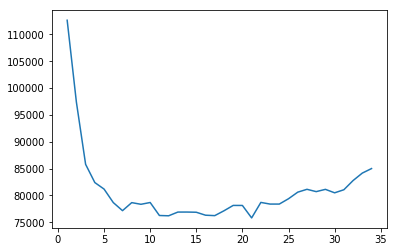

In [7]:
no_of_comp_Z_1 = get_no_of_comp(Z_1)
print no_of_comp_Z_1

10


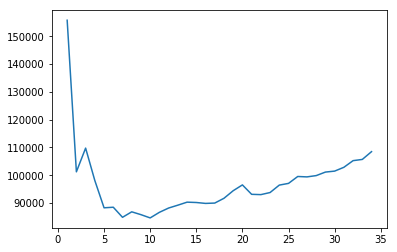

In [8]:
no_of_comp_Z_2 = get_no_of_comp(Z_2)
print no_of_comp_Z_2

7


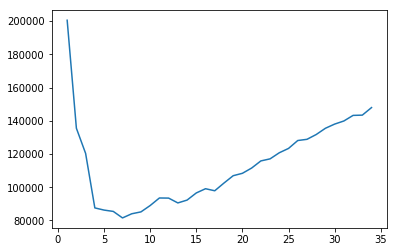

In [9]:
no_of_comp_Z_3 = get_no_of_comp(Z_3)
print no_of_comp_Z_3

In [11]:
def fitGMM(data, no_of_comp):
    gmm = GMM(no_of_comp, covariance_type='full', random_state=0)
    gmm.fit(data)
    print(gmm.converged_)

In [12]:
fitGMM(Z_1,no_of_comp_Z_1)

True


In [13]:
fitGMM(Z_2,no_of_comp_Z_2)

True


In [14]:
fitGMM(Z_3,no_of_comp_Z_3)

True
